In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
# Read and prepare the data
path = '/mnt/c/Users/u1531276/Desktop/coursework/bmi6015_applied_ml/final_project/raw_data/'
df = pd.read_csv(path + "clinical_data.csv")

In [78]:
# Basic descriptive statistics
print("\nDescriptive statistics for numerical variables:")
print(df[['age', 'survival_months']].describe())


Descriptive statistics for numerical variables:
              age  survival_months
count  954.000000       955.000000
mean    64.718303        38.674407
std     10.289043        33.390188
min     25.000000         0.000000
25%     58.000000        16.000000
50%     66.000000        28.500000
75%     72.000000        53.033333
max     88.000000       238.287800


In [79]:
# Missing values summary
print("\nMissing values summary:")
print(df.isnull().sum())


Missing values summary:
patient_id          0
study_id            0
sex                 0
age                35
race               62
histology           0
smoking_status     18
stage               7
survival_months    34
survival_status     4
egfr_mutated        0
kras_mutated        0
tp53_mutated        0
dtype: int64


/tmp/ipykernel_621/2272973645.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoking_status', y='survival_months', palette='Set3')


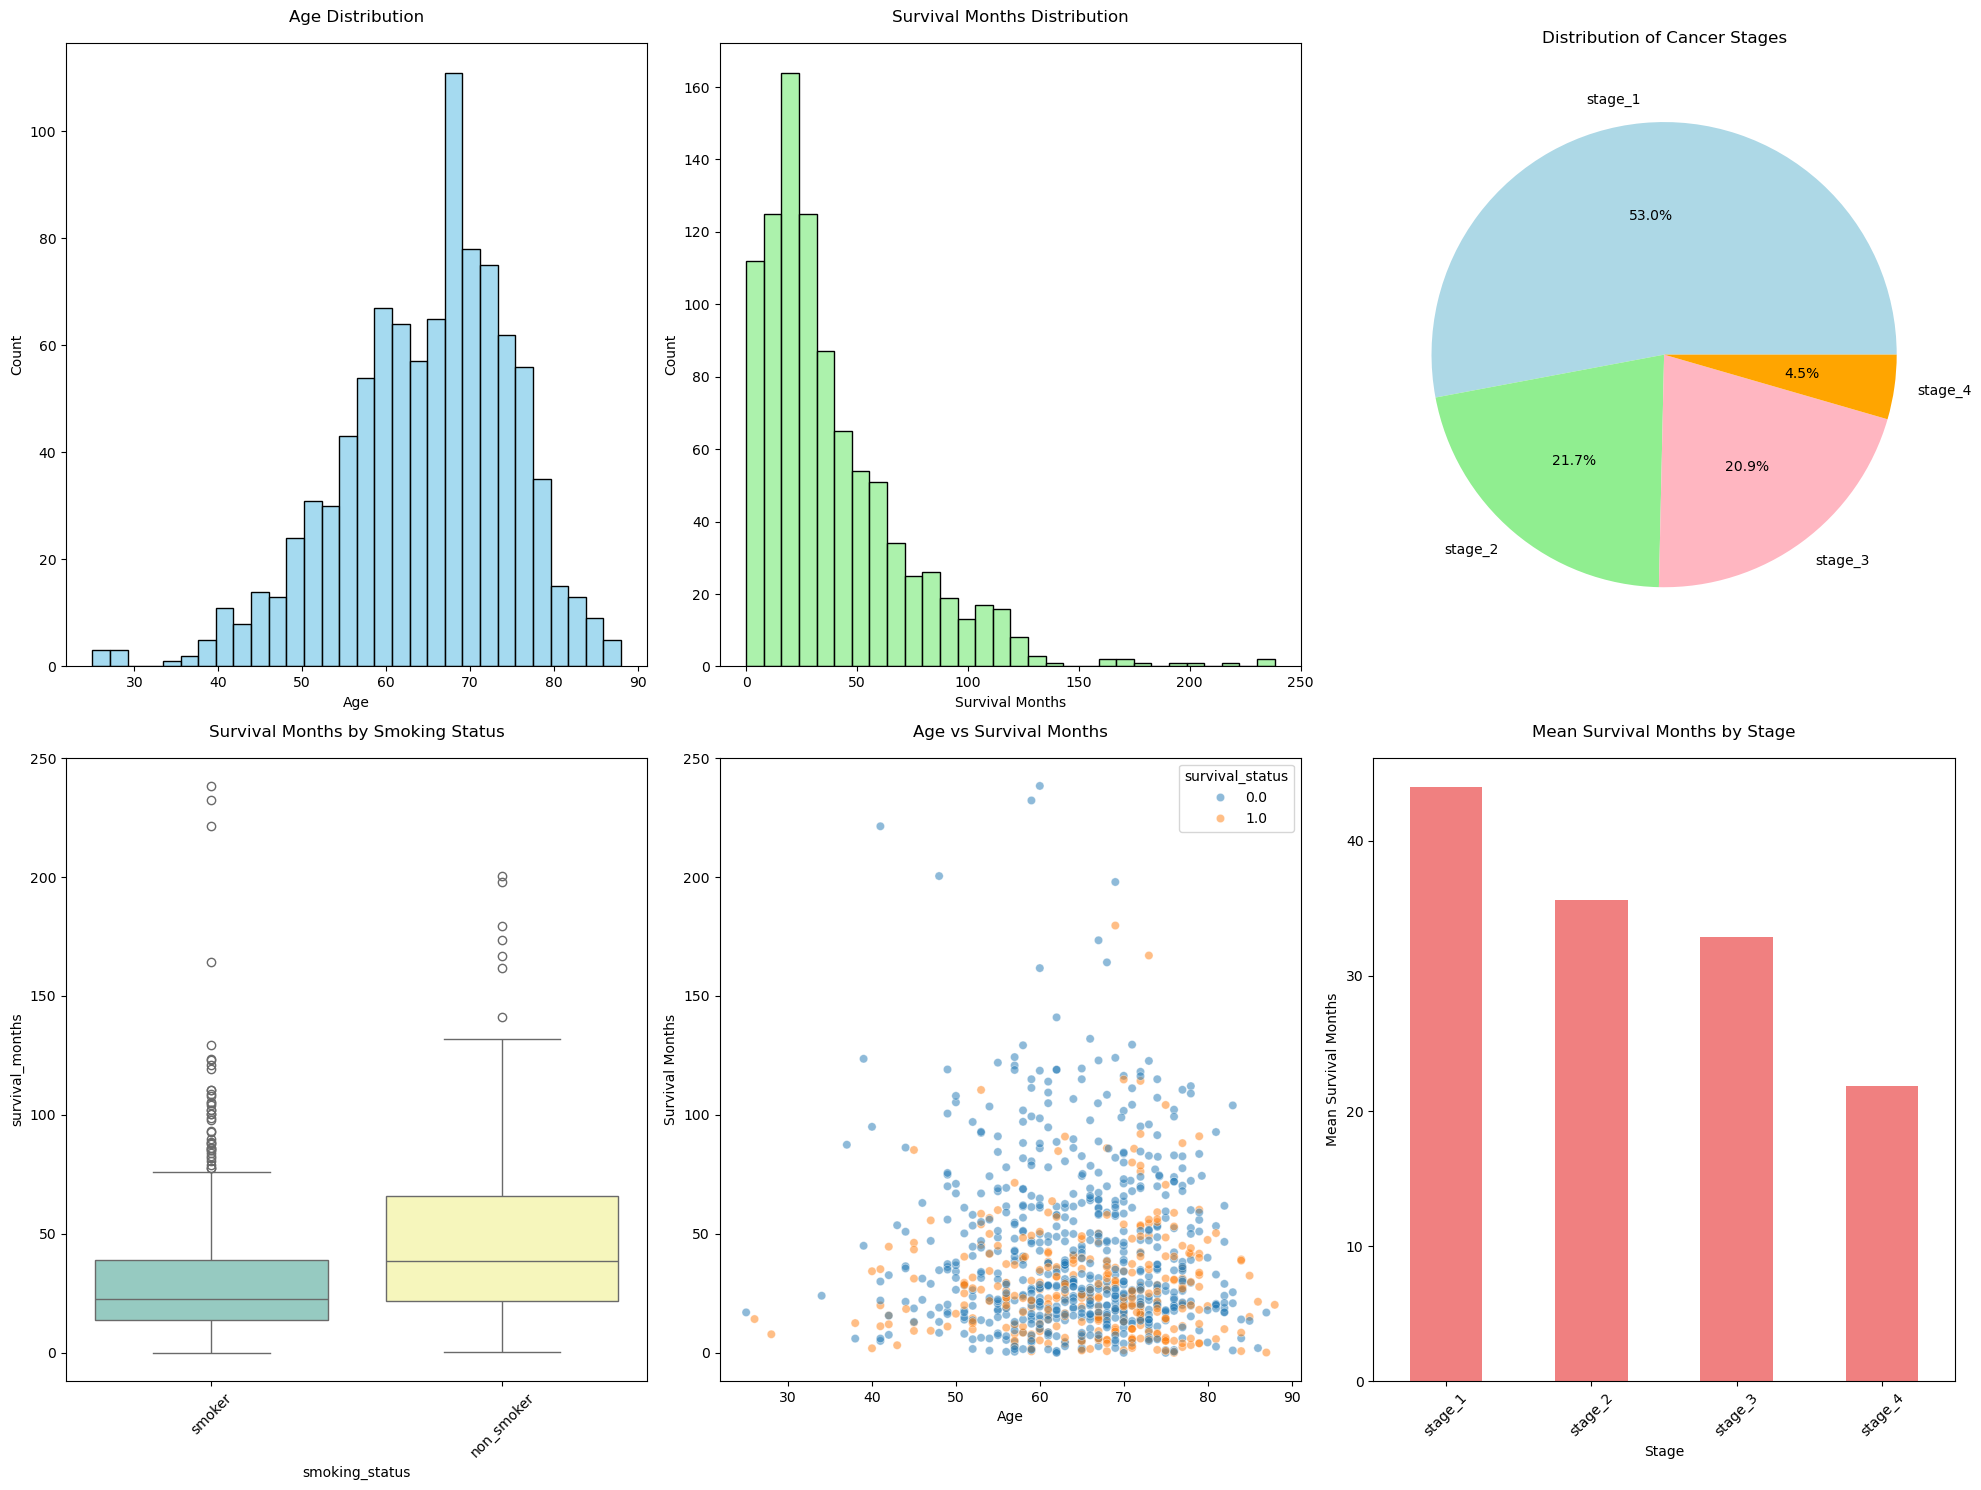

In [80]:
plt.figure(figsize=(20, 15))

# 1. Age distribution
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='age', bins=30, color='skyblue')
plt.title('Age Distribution', pad=15, fontsize=12)
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Survival months distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='survival_months', bins=30, color='lightgreen')
plt.title('Survival Months Distribution', pad=15, fontsize=12)
plt.xlabel('Survival Months')
plt.ylabel('Count')

# 3. Stage distribution
plt.subplot(2, 3, 3)
stage_counts = df['stage'].value_counts()
colors = ['lightblue', 'lightgreen', 'lightpink', 'orange', 'yellow']
plt.pie(stage_counts.values, labels=stage_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Cancer Stages', pad=15, fontsize=12)

# 4. Survival by smoking status
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='smoking_status', y='survival_months', palette='Set3')
plt.title('Survival Months by Smoking Status', pad=15, fontsize=12)
plt.xticks(rotation=45)

# 5. Age vs Survival Months scatter plot
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='age', y='survival_months', hue='survival_status', alpha=0.5)
plt.title('Age vs Survival Months', pad=15, fontsize=12)
plt.xlabel('Age')
plt.ylabel('Survival Months')

# 6. Mean survival months by stage
plt.subplot(2, 3, 6)
mean_survival_by_stage = df.groupby('stage')['survival_months'].mean().sort_values(ascending=False)
ax = mean_survival_by_stage.plot(kind='bar', color='lightcoral')
plt.title('Mean Survival Months by Stage', pad=15, fontsize=12)
plt.xlabel('Stage')
plt.ylabel('Mean Survival Months')
plt.xticks(rotation=45)

plt.tight_layout()

In [81]:
# Statistical Analysis
print("\nCorrelation between age and survival months:")
correlation = df['age'].corr(df['survival_months'])
print(f"{correlation:.3f}")

print("\nSurvival rate by smoking status:")
print(df.groupby('smoking_status')['survival_status'].mean().round(3))

print("\nMean survival months by stage:")
print(df.groupby('stage')['survival_months'].mean().round(2))

# Gender distribution
print("\nGender distribution:")
print(df['sex'].value_counts(normalize=True).round(3))

# Race distribution
print("\nRace distribution:")
print(df['race'].value_counts(normalize=True).round(3))

# Additional summary statistics by stage
stage_summary = df.groupby('stage').agg({
    'survival_months': ['mean', 'median', 'std', 'count'],
    'survival_status': 'mean'
}).round(2)

print("\nDetailed statistics by stage:")
print(stage_summary)

plt.show()


Correlation between age and survival months:
-0.040

Survival rate by smoking status:
smoking_status
non_smoker    0.291
smoker        0.354
Name: survival_status, dtype: float64

Mean survival months by stage:
stage
stage_1    43.97
stage_2    35.59
stage_3    32.87
stage_4    21.88
Name: survival_months, dtype: float64

Gender distribution:
sex
female    0.57
male      0.43
Name: proportion, dtype: float64

Race distribution:
race
caucasian           0.612
asian               0.337
african_american    0.051
other               0.001
Name: proportion, dtype: float64

Detailed statistics by stage:
        survival_months                     survival_status
                   mean median    std count            mean
stage                                                      
stage_1           43.97  33.38  36.17   500            0.22
stage_2           35.59  28.12  29.71   206            0.40
stage_3           32.87  22.97  29.84   199            0.48
stage_4           21.88  18.84  18